In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

In [2]:
data = pd.read_csv("Datasets/data1/Travel.csv")
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [5]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
data.isnull().mean()

CustomerID                  0.000000
ProdTaken                   0.000000
Age                         0.046236
TypeofContact               0.005115
CityTier                    0.000000
DurationOfPitch             0.051350
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.009206
ProductPitched              0.000000
PreferredPropertyStar       0.005319
MaritalStatus               0.000000
NumberOfTrips               0.028642
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    0.013502
Designation                 0.000000
MonthlyIncome               0.047668
dtype: float64

<AxesSubplot:>

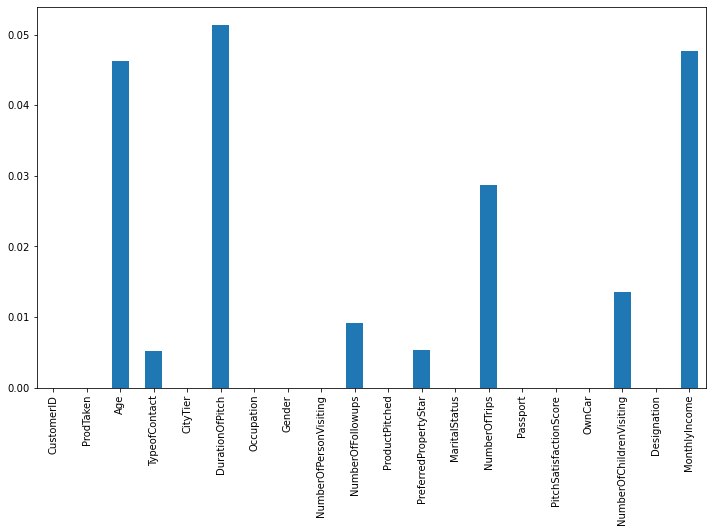

In [8]:
data.isnull().mean().plot.bar(figsize=(12,7))

In [9]:
data = data.replace(' ',np.nan)

In [10]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [11]:
label_freq_all = list()
for i in data.columns:
    label_freq_all.append(data[i].value_counts()/len(data))

In [12]:
df_freq = list()
for i in label_freq_all:
    df_freq.append(pd.DataFrame(i))
df_freq

[        CustomerID
 200000    0.000205
 203256    0.000205
 203263    0.000205
 203262    0.000205
 203261    0.000205
 ...            ...
 201628    0.000205
 201627    0.000205
 201626    0.000205
 201625    0.000205
 204887    0.000205
 
 [4888 rows x 1 columns],
    ProdTaken
 0   0.811784
 1   0.188216,
            Age
 35.0  0.048486
 36.0  0.047259
 34.0  0.043167
 31.0  0.041530
 30.0  0.040712
 32.0  0.040303
 33.0  0.038666
 37.0  0.037848
 29.0  0.036416
 38.0  0.036007
 41.0  0.031710
 39.0  0.030687
 28.0  0.030074
 40.0  0.029869
 42.0  0.029051
 27.0  0.028232
 43.0  0.026596
 46.0  0.024755
 45.0  0.023732
 26.0  0.021686
 44.0  0.021481
 51.0  0.018412
 47.0  0.018003
 50.0  0.017594
 25.0  0.015139
 52.0  0.013912
 53.0  0.013502
 48.0  0.013298
 49.0  0.013298
 55.0  0.013093
 54.0  0.012480
 56.0  0.011866
 24.0  0.011457
 22.0  0.009411
 23.0  0.009411
 59.0  0.009002
 21.0  0.008388
 20.0  0.007774
 19.0  0.006547
 58.0  0.006342
 57.0  0.005933
 60.0  0.005933
 

In [13]:
df_freq[2]

,Age
35.0,0.048486
36.0,0.047259
34.0,0.043167
31.0,0.041530
30.0,0.040712
32.0,0.040303
33.0,0.038666
37.0,0.037848
29.0,0.036416
38.0,0.036007


C:\Users\athar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

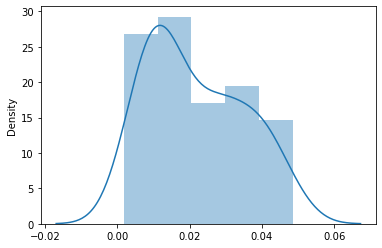

In [36]:
sns.distplot(df_freq[2])

In [14]:
label_freq_all_df = pd.DataFrame({
    "col":data.columns,
    "freq": df_freq
})
label_freq_all_df

,col,freq
0,CustomerID,CustomerID 200000 0.000205 203256 ...
1,ProdTaken,ProdTaken 0 0.811784 1 0.188216
2,Age,Age 35.0 0.048486 36.0 0.047259 3...
3,TypeofContact,TypeofContact Self Enquiry ...
4,CityTier,CityTier 1 0.652619 3 0.306874 2 0.040507
5,DurationOfPitch,DurationOfPitch 9.0 0.098813 ...
6,Occupation,Occupation Salaried 0...
7,Gender,Gender Male 0.596563 Female 0...
8,NumberOfPersonVisiting,NumberOfPersonVisiting 3 0.4...
9,NumberOfFollowups,NumberOfFollowups 4.0 0.423077 ...


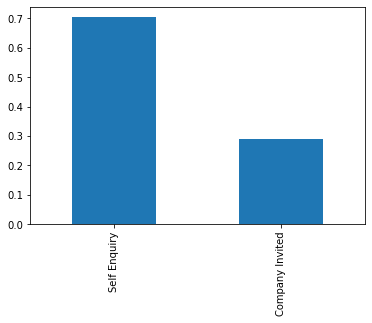

In [15]:
fig = label_freq_all[3].sort_values(ascending=False).plot.bar()

C:\Users\athar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

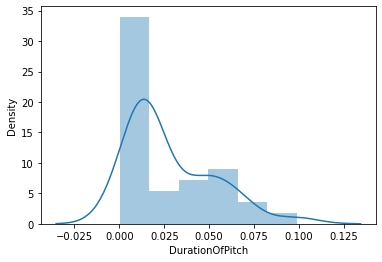

In [16]:
sns.distplot(label_freq_all[5])

Text(0.5, 1.0, 'mean of missing values')

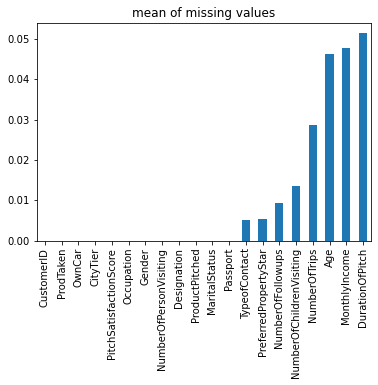

In [17]:
data.isna().mean().sort_values(ascending=True).plot.bar()
plt.title(label="mean of missing values")

In [18]:
data_dropna = data.dropna()
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases:{}'.format(len(data_dropna)))

Number of total observations: 4888
Number of observations with complete cases:4128


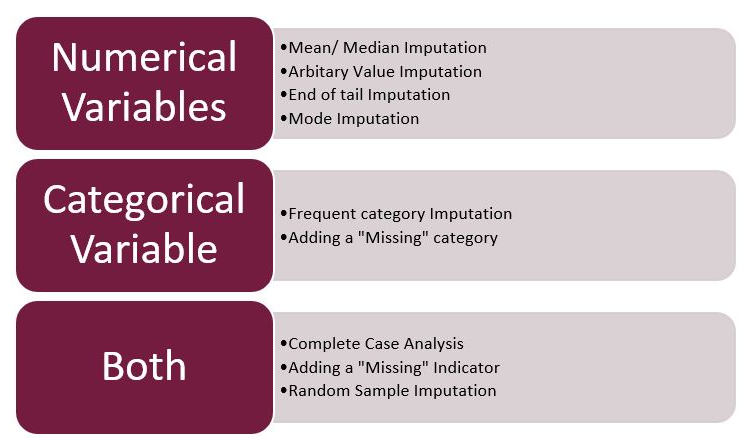

## Numerical  variables:

In [19]:
num_data = [i for i in data.columns if data[i].dtype != 'O']

In [20]:
num_df = data[num_data]

## Catagorical variables:

In [134]:
cat_data = [i for i in data.columns if data[i].dtype == 'O']

In [135]:
cat_df = data[cat_data]

## finding null values:

In [23]:
num_df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
CityTier                      0
DurationOfPitch             251
NumberOfPersonVisiting        0
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

In [24]:
before_drop = num_df.count()

In [25]:
num_df_2 = num_df.dropna()

<AxesSubplot:>

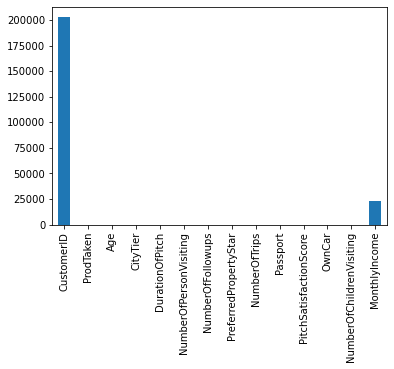

In [26]:
num_df_2.mean().plot.bar()

In [27]:
after_drop = num_df_2.count()

In [28]:
before_drop - after_drop

CustomerID                  760
ProdTaken                   760
Age                         534
CityTier                    760
DurationOfPitch             509
NumberOfPersonVisiting      760
NumberOfFollowups           715
PreferredPropertyStar       734
NumberOfTrips               620
Passport                    760
PitchSatisfactionScore      760
OwnCar                      760
NumberOfChildrenVisiting    694
MonthlyIncome               527
dtype: int64

<b>Huge loss of data is dropping variables which have null/NaN values</b>

# filling na with mean:

In [29]:
num_df_3 = num_df.fillna(num_df.mean())

In [30]:
num_df_3.isna().count()

CustomerID                  4888
ProdTaken                   4888
Age                         4888
CityTier                    4888
DurationOfPitch             4888
NumberOfPersonVisiting      4888
NumberOfFollowups           4888
PreferredPropertyStar       4888
NumberOfTrips               4888
Passport                    4888
PitchSatisfactionScore      4888
OwnCar                      4888
NumberOfChildrenVisiting    4888
MonthlyIncome               4888
dtype: int64

# filling na with median:

In [31]:
num_df_4 = num_df.fillna(num_df.median())

In [32]:
num_df_4.isna().count()

CustomerID                  4888
ProdTaken                   4888
Age                         4888
CityTier                    4888
DurationOfPitch             4888
NumberOfPersonVisiting      4888
NumberOfFollowups           4888
PreferredPropertyStar       4888
NumberOfTrips               4888
Passport                    4888
PitchSatisfactionScore      4888
OwnCar                      4888
NumberOfChildrenVisiting    4888
MonthlyIncome               4888
dtype: int64

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

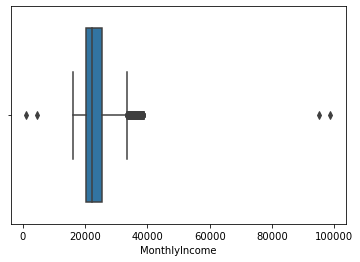

In [52]:
sns.boxplot(num_df.MonthlyIncome)

<AxesSubplot:>

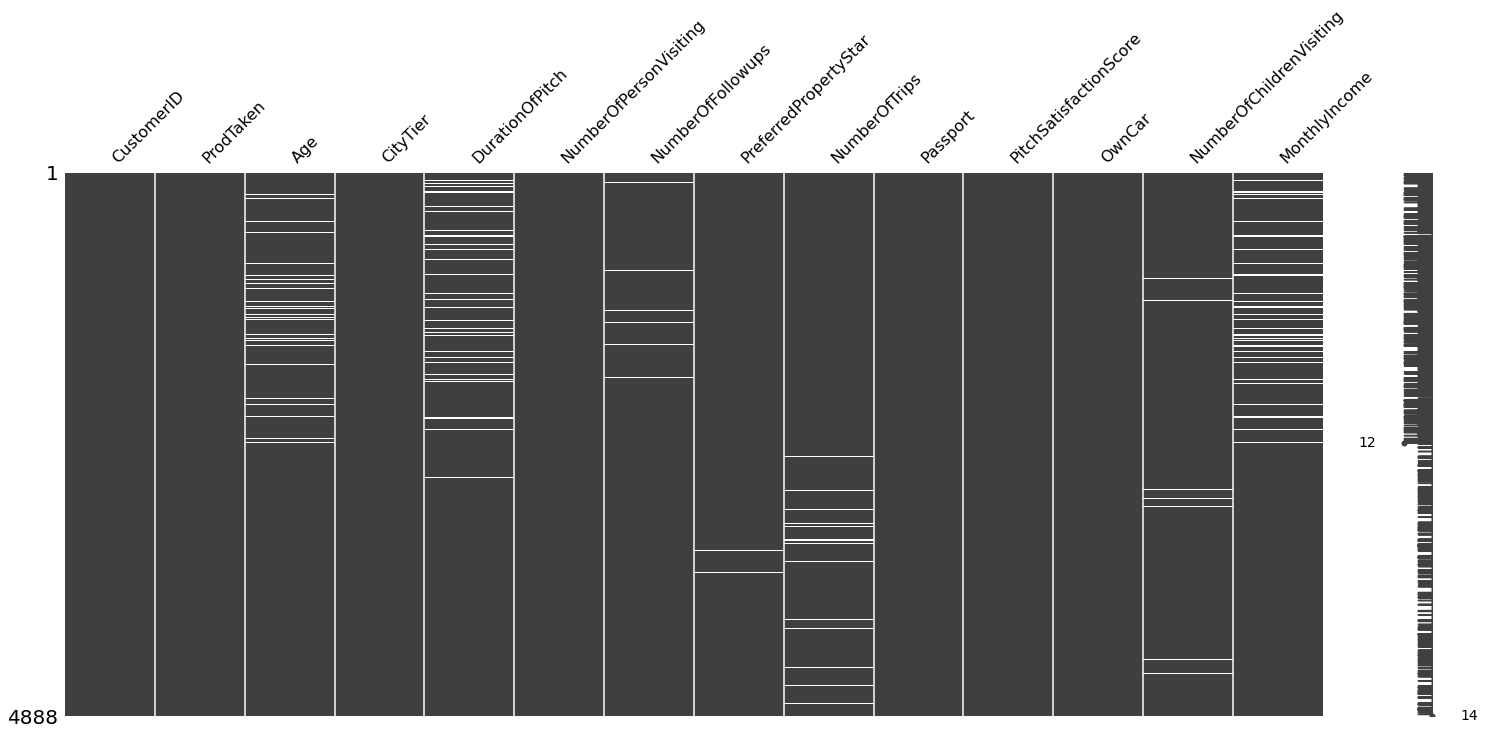

In [55]:
msno.matrix(num_df)

# mean and mode imputeation bt sklearn lib:

In [59]:
df_mean = num_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean['MonthlyIncome'] = mean_imputer.fit_transform(df_mean['MonthlyIncome'].values.reshape(-1,1))

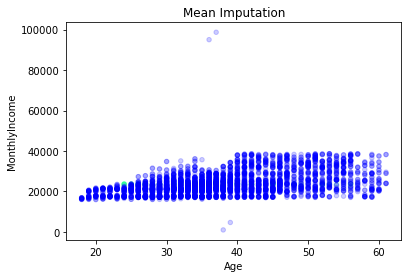

In [79]:
fig = plt.Figure()
null_values = num_df['MonthlyIncome'].isnull()
fig = df_mean.plot(x="Age", y='MonthlyIncome', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False, alpha = 0.2)


C:\Users\athar\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


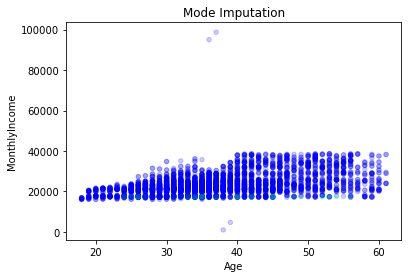

In [93]:
df_mode = num_df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode['MonthlyIncome'] = mode_imputer.fit_transform(df_mode['MonthlyIncome'].values.reshape(-1,1))


fig = plt.Figure()
null_values = num_df['MonthlyIncome'].isnull()
fig = df_mode.plot(x='Age', y='MonthlyIncome', kind='scatter', c=null_values, cmap='winter', title='Mode Imputation', colorbar=False, alpha = 0.2)

# KNN Imputer:

In [ ]:
KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean')

KNNImputer has several parameters such as missing_values which by default set to np.nan, n_neighbors which is the selected number of neighboring samples to use for imputation by default set to 5, metric which is the distance metric for searching neighbors by default set as ‘nan-euclidean’ but can also be defined with user-defined functions.

KNNImputer can work with continuous, discrete and categorical data types but not with text data. Therefore, I filtered the data with a selected subset of columns — Distance, MaxSpeed, AvgSpeed and AvgMoovingSpeed. In addition, I used MinMaxScaler from scikit-learn to normalize this numeric data between 0 and 1. Since KNNImputer is a distance-based algorithm scaling is an important step in the pipeline.

In [68]:
num_df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [69]:
#Define a subset of the dataset
df_knn = num_df.filter(['Age','DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

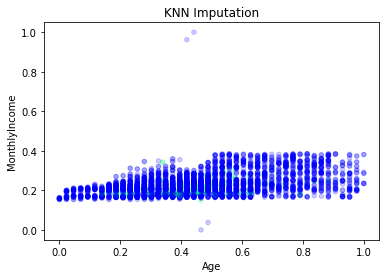

In [76]:
fig = plt.Figure()
null_values = num_df['MonthlyIncome'].isnull() 
fig = df_knn_imputed.plot(x='Age', y='MonthlyIncome', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False, alpha = 0.2)

# MICE Imputation:

In [73]:
df_mice = num_df.filter(['Age','DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome'], axis=1).copy()
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)


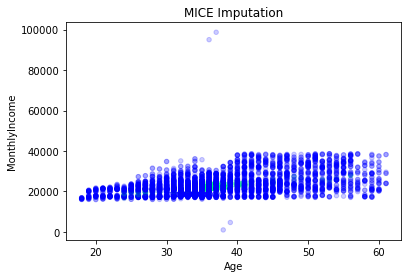

In [75]:
fig = plt.Figure()
null_values = num_df['MonthlyIncome'].isnull() 
fig = df_mice_imputed.plot(x='Age', y='MonthlyIncome', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False, alpha = 0.2)

# Catagorical data null/Nan values:

In [80]:
cat_df.head()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [81]:
cat_df.describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [82]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TypeofContact   4863 non-null   object
 1   Occupation      4888 non-null   object
 2   Gender          4888 non-null   object
 3   ProductPitched  4888 non-null   object
 4   MaritalStatus   4888 non-null   object
 5   Designation     4888 non-null   object
dtypes: object(6)
memory usage: 229.2+ KB


In [83]:
cat_df.memory_usage()

Index               128
TypeofContact     39104
Occupation        39104
Gender            39104
ProductPitched    39104
MaritalStatus     39104
Designation       39104
dtype: int64

In [84]:
cat_df.isnull().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

In [85]:
cat_df.isna().sum()

TypeofContact     25
Occupation         0
Gender             0
ProductPitched     0
MaritalStatus      0
Designation        0
dtype: int64

<AxesSubplot:>

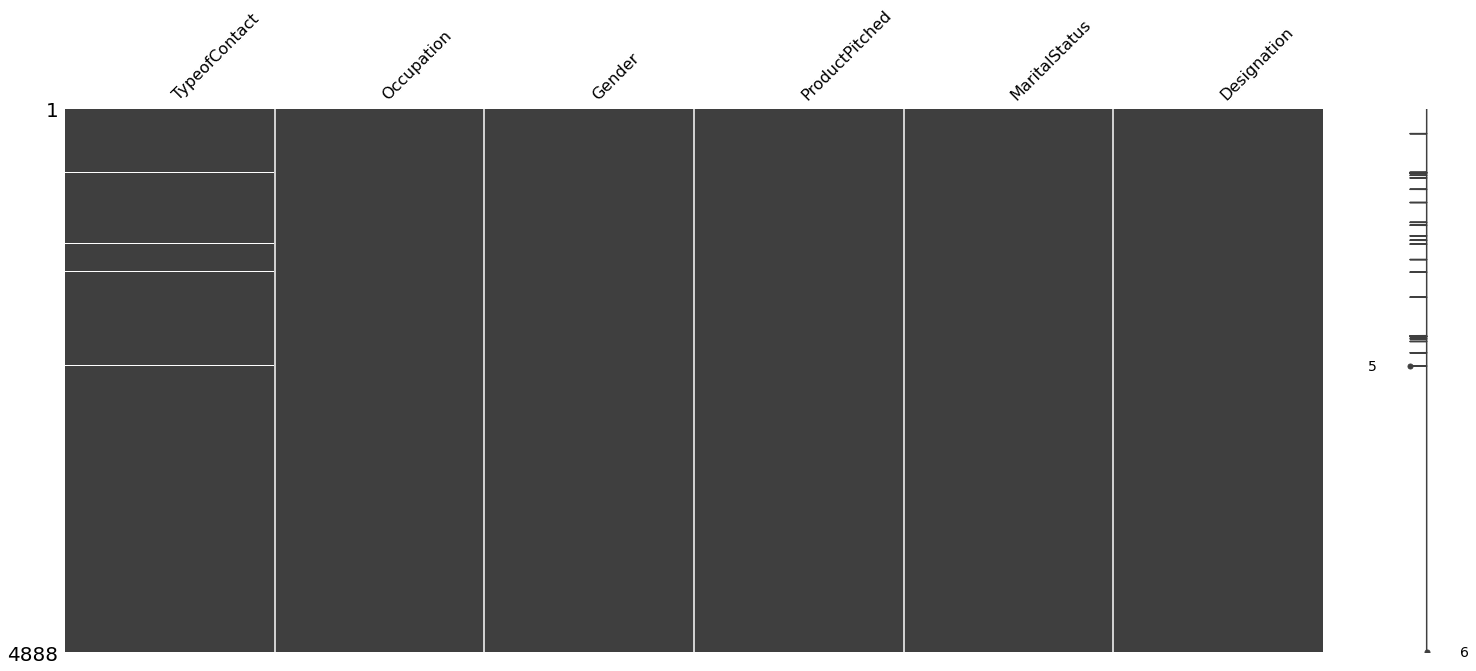

In [89]:
msno.matrix(cat_df)

In [92]:
df_mode2 = cat_df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode2['TypeofContact'] = mode_imputer.fit_transform(df_mode2['TypeofContact'].values.reshape(-1,1))

<AxesSubplot:xlabel='TypeofContact', ylabel='Count'>

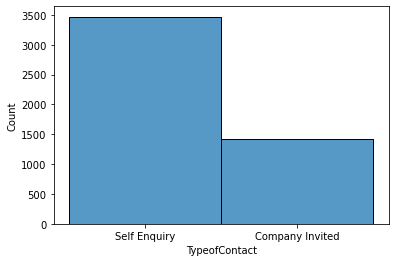

In [101]:
sns.histplot(df_mode2.TypeofContact)

<AxesSubplot:xlabel='TypeofContact', ylabel='Count'>

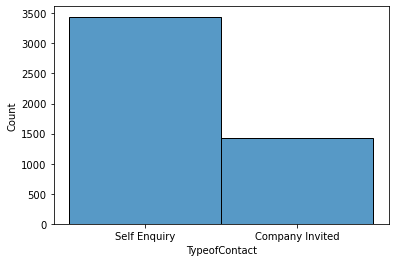

In [117]:
sns.histplot(cat_df.TypeofContact)

In [120]:
cat_df.nunique()

TypeofContact     2
Occupation        4
Gender            3
ProductPitched    5
MaritalStatus     4
Designation       5
dtype: int64

In [122]:
cat_df['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

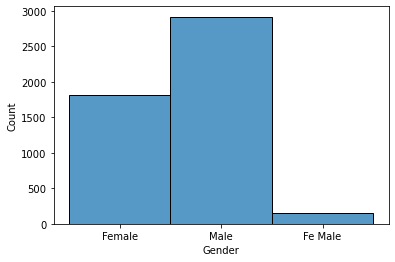

In [136]:
sns.histplot(cat_df.Gender)

In [137]:
cat_df['Gender'] = cat_df['Gender'].replace("Fe Male","Female")

C:\Users\athar\AppData\Local\Temp\ipykernel_3056\1015894664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender'] = cat_df['Gender'].replace("Fe Male","Female")


In [138]:
cat_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='Count'>

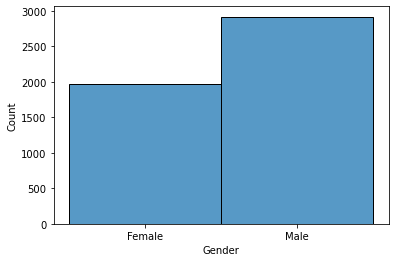

In [139]:
sns.histplot(cat_df.Gender)